In [10]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# ^^ Just another way to write the two limits

lat_lngs = zip(lats, lngs)

lat_lngs

In [12]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [13]:
# Use the print() function to display the latitude and longitude combinations

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

5.63408921613842 -149.2834683187679
-22.564284871171566 -44.76389206249212
24.022297921515857 175.3167569329704
-24.44275493950758 5.177718978771594
-24.068831759758893 -20.893358218153935
-61.01131844371989 30.650763902990207
-26.892810836425156 116.02171108647673
-53.88908887760813 166.25020081254007
-80.04591243480226 118.03111164062648
-31.062732734197276 95.53686958631647
37.829725895063504 145.4681285021357
-45.83015701243421 134.7444376410271
-75.59970073807301 -51.1544641243087
68.08961267845336 -51.50682475349029
60.22277061121889 -74.82506752264757
-44.72313143176094 70.98432377562906
-30.758785184839113 10.749152906000887
6.052082709708316 1.3108101209527092
8.175029522550687 97.38241308691414
82.93974191538285 -150.11263478057782
-89.91248054007342 -58.89181275457172
62.313938772928736 -18.51569134934948
13.687569972792048 -138.9249343975868
59.901626406109216 -163.9001498804155
37.2875964384059 111.33089378784979
-76.11352197879006 169.01410277794724
-67.12146294231158 73.

-28.655413192364975 -158.0901346555641
35.71635414603611 36.36339848381229
17.057386083579075 -168.1152567523474
-30.400901168569604 -139.97044581697656
-25.450671679098164 2.1667543752342056
-3.8867602121325433 39.253616362911345
16.685261133023715 -146.0758739388565
-9.513399317434349 13.47831404614729
-17.093791557882554 46.14908776886435
-40.784298560144244 141.05300033288978
-47.28849206930944 -148.7061222296025
-80.77633895539 50.911202405568304
34.756312643591116 -15.51526198375629
37.649309336091704 -63.827704688406186
-82.78320857634806 -102.85540596097448
-45.06040467156521 96.44563505894916
-19.46897670777092 -55.288344719445604
-38.472181321635546 139.64031151117962
-74.58235214751961 -153.70822509708938
47.26800915690245 157.2708508761238
-53.06891603030185 -118.50105519631826
77.27781930482769 -56.112504147827224
59.18519695172563 -47.43025436978397
17.135209988833864 -179.50969814053605
69.7627015210494 -176.20240675932325
-1.4844112257686817 -60.3896153038628
68.5613679

In [18]:
from citipy import citipy

# Import the requests library

import requests

# Import the API kry

from config import weather_api_key

# Import the time library and the datetime module from the datetime library 

import time

from datetime import datetime

# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [19]:
# Creat a list for holding the cities

cities = []

# Identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then add it to cities list
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count

len(cities)

599

In [21]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.

record_count = 1
set_count = 1

# Loop through all the cities in our list

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes (due to OpenWeatherMap API allowing 60 calls per min for free tier
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        
    # Create endpoint URL with each city
    
    city_url = url + "&q=" + city.replace(" ", "+")
    
    
    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
# Run an API request for each of the cities.

    try:
        
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          
                          "Lat": city_lat,
                          
                          "Lng": city_lng,
                          
                          "Max Temp": city_max_temp,
                          
                          "Humidity": city_humidity,
                          
                          "Cloudiness": city_clouds,
                          
                          "Wind Speed": city_wind,
                          
                          "Country": city_country,
                          
                          "Date": city_date})

# If an error is experienced, skip the city.
    
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | cruzeiro
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | henties bay
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | geraldton
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | kamaishi
Processing Record 12 of Set 1 | mount gambier
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | qasigiannguit
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | souillac
Processing Record 17 of Set 1 | luderitz
Processing Record 18 of Set 1 | aflao
Processing Record 19 of Set 1 | kathu
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | vestmannaeyjar
Processing Record 22 of Set 1 | bethel
Processing Record 23 of Set 1 | jiexiu
Processing Record 24 of Set 1 | saint-philippe
Processing R

Processing Record 40 of Set 4 | jalu
Processing Record 41 of Set 4 | coihaique
Processing Record 42 of Set 4 | lerwick
Processing Record 43 of Set 4 | chuy
Processing Record 44 of Set 4 | richards bay
Processing Record 45 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 46 of Set 4 | sakakah
Processing Record 47 of Set 4 | komsomolskiy
Processing Record 48 of Set 4 | neyshabur
Processing Record 49 of Set 4 | sur
Processing Record 50 of Set 4 | azimur
City not found. Skipping...
Processing Record 1 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 5 | dunedin
Processing Record 3 of Set 5 | idlib
Processing Record 4 of Set 5 | horadiz
Processing Record 5 of Set 5 | ahipara
Processing Record 6 of Set 5 | nara
Processing Record 7 of Set 5 | mahbubabad
Processing Record 8 of Set 5 | fukue
Processing Record 9 of Set 5 | evensk
Processing Record 10 of Set 5 | avarua
Processing Record 11 of Set 5 | bogande
Processing Record 12 of Set 5 | balikpapan


Processing Record 24 of Set 8 | korla
Processing Record 25 of Set 8 | rosarito
Processing Record 26 of Set 8 | athabasca
Processing Record 27 of Set 8 | bonoua
Processing Record 28 of Set 8 | vostok
Processing Record 29 of Set 8 | horta
Processing Record 30 of Set 8 | codrington
Processing Record 31 of Set 8 | seelze
Processing Record 32 of Set 8 | lakatoro
Processing Record 33 of Set 8 | jardim
Processing Record 34 of Set 8 | dickson
Processing Record 35 of Set 8 | acapulco
Processing Record 36 of Set 8 | gacko
Processing Record 37 of Set 8 | mandera
Processing Record 38 of Set 8 | were ilu
Processing Record 39 of Set 8 | acarau
Processing Record 40 of Set 8 | saint-georges
Processing Record 41 of Set 8 | marawi
Processing Record 42 of Set 8 | virginia beach
Processing Record 43 of Set 8 | vanavara
Processing Record 44 of Set 8 | batagay-alyta
Processing Record 45 of Set 8 | dejen
Processing Record 46 of Set 8 | hanzhong
Processing Record 47 of Set 8 | armizonskoye
Processing Record 4

Processing Record 11 of Set 12 | amahai
Processing Record 12 of Set 12 | sao miguel
Processing Record 13 of Set 12 | atchison
Processing Record 14 of Set 12 | price
Processing Record 15 of Set 12 | hofn
Processing Record 16 of Set 12 | roanoke rapids
Processing Record 17 of Set 12 | nanga eboko
Processing Record 18 of Set 12 | steinfurt
Processing Record 19 of Set 12 | hemsedal
Processing Record 20 of Set 12 | preobrazheniye
Processing Record 21 of Set 12 | poyarkovo
Processing Record 22 of Set 12 | port augusta
Processing Record 23 of Set 12 | rovinj
Processing Record 24 of Set 12 | dembi dolo
Processing Record 25 of Set 12 | saiha
Processing Record 26 of Set 12 | timra
Processing Record 27 of Set 12 | llangefni
Processing Record 28 of Set 12 | luanshya
Processing Record 29 of Set 12 | tsienyane
City not found. Skipping...
Processing Record 30 of Set 12 | rurrenabaque
Processing Record 31 of Set 12 | wellington
Processing Record 32 of Set 12 | khor
Processing Record 33 of Set 12 | hus

In [23]:
len(city_data)

545

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2022-08-29 20:24:29,19.7297,-155.0900,88.29,71,75,9.22
1,Cruzeiro,BR,2022-08-29 20:24:29,-22.5761,-44.9628,59.16,91,100,6.26
2,Butaritari,KI,2022-08-29 20:24:29,3.0707,172.7902,81.59,72,100,16.80
3,Henties Bay,NA,2022-08-29 20:24:30,-22.1160,14.2845,53.82,87,2,5.21
4,Jamestown,US,2022-08-29 20:24:28,42.0970,-79.2353,71.24,88,100,9.22


In [26]:
# Create the output file(CSV)

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a csv

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/29/22'

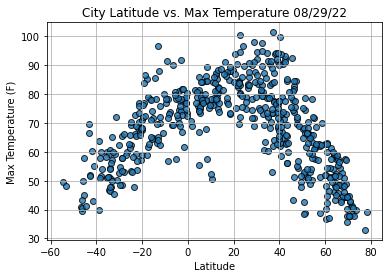

In [30]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

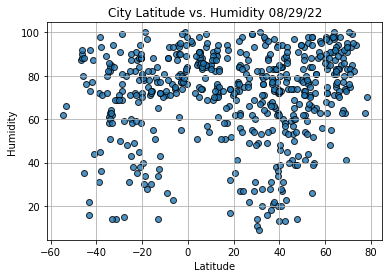

In [34]:
# Build the scatter plot for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

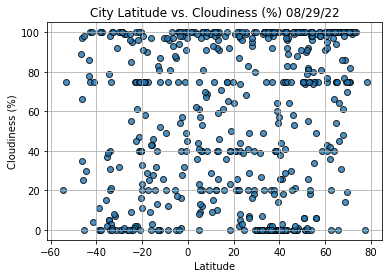

In [36]:
# Build the scatter plot for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

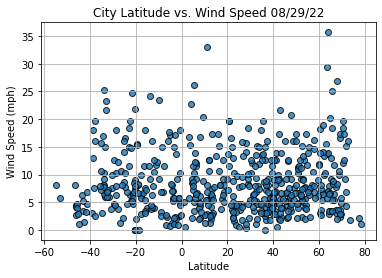

In [39]:
# Build the scatter plot for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()